In [1]:
import pandas as pd
import numpy as np

delivery_duration_time = pd.read_excel("historical_data.xlsx")

In [2]:
delivery_duration_time.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [3]:
delivery = delivery_duration_time.copy()

In [4]:
delivery.shape

(197428, 16)

In [5]:
delivery.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [6]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [7]:
delivery["target"]=np.nan


In [8]:
delShape = delivery.shape
delShape

(197428, 17)

In [9]:
nulls = delivery[delivery["actual_delivery_time"].isnull()].copy()
for x in (nulls.index):
    a=delivery["created_at"][x]
    delivery["actual_delivery_time"][x]=a


<ipython-input-9-d6b2ccaddcf8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery["actual_delivery_time"][x]=a


In [10]:
delivery[delivery["actual_delivery_time"].isnull()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,target


In [11]:
for x in range(delShape[0]):
    time1 = delivery['created_at'][x]
    time2 = delivery['actual_delivery_time'][x]
    delivery["target"][x] = ((time2.hour-time1.hour)*3600)+((time2.minute-time1.minute)*60)+(time2.second-time1.second)

<ipython-input-11-ccd1b8bbb21a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery["target"][x] = ((time2.hour-time1.hour)*3600)+((time2.minute-time1.minute)*60)+(time2.second-time1.second)


ok!!now we have targets...we can start

oh no...if you look at the delivery.describe you see that we have negative prices in min_item_price!!!!

In [12]:
delivery.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,target
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,197428.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935,253.065821
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902,14795.142767
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,-85869.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2048.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,2622.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,3347.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,73282.000000


In [13]:
delivery.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,target
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


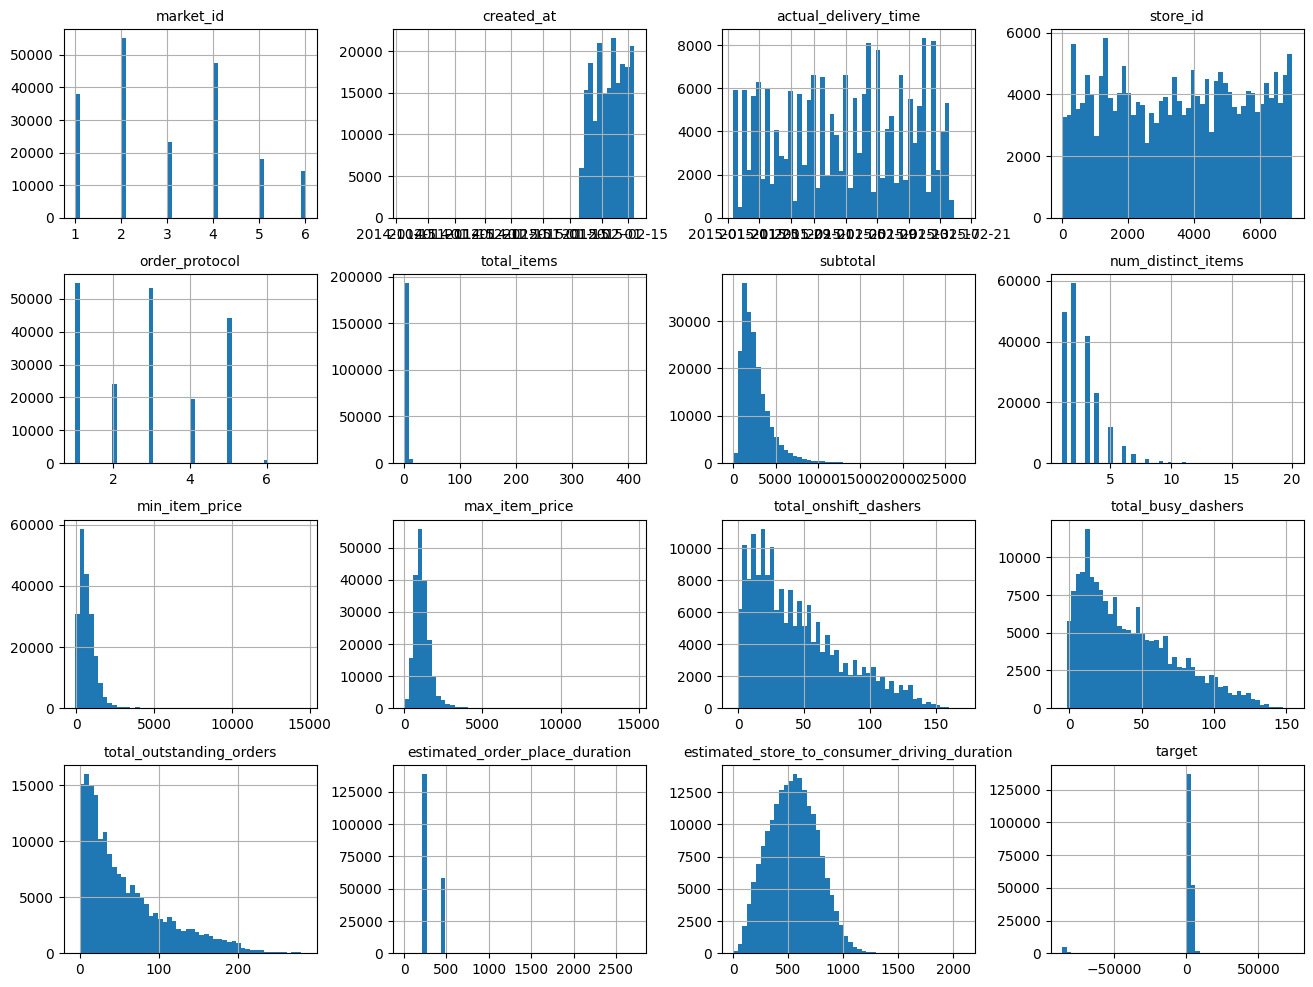

In [14]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

delivery.hist(bins=50, figsize=(16, 12))
plt.show()

ooo seems that total_busy_dashers and target have negative values,lets positive them.

In [15]:
delivery["total_busy_dashers"][delivery["total_busy_dashers"]<0] = -delivery["total_busy_dashers"]
delivery["min_item_price"][delivery["min_item_price"]<0] = -delivery['min_item_price']


<ipython-input-15-5a81cb475333>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery["total_busy_dashers"][delivery["total_busy_dashers"]<0] = -delivery["total_busy_dashers"]
<ipython-input-15-5a81cb475333>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery["min_item_price"][delivery["min_item_price"]<0] = -delivery['min_item_price']


In [16]:
delivery = delivery[delivery['target']>=0]

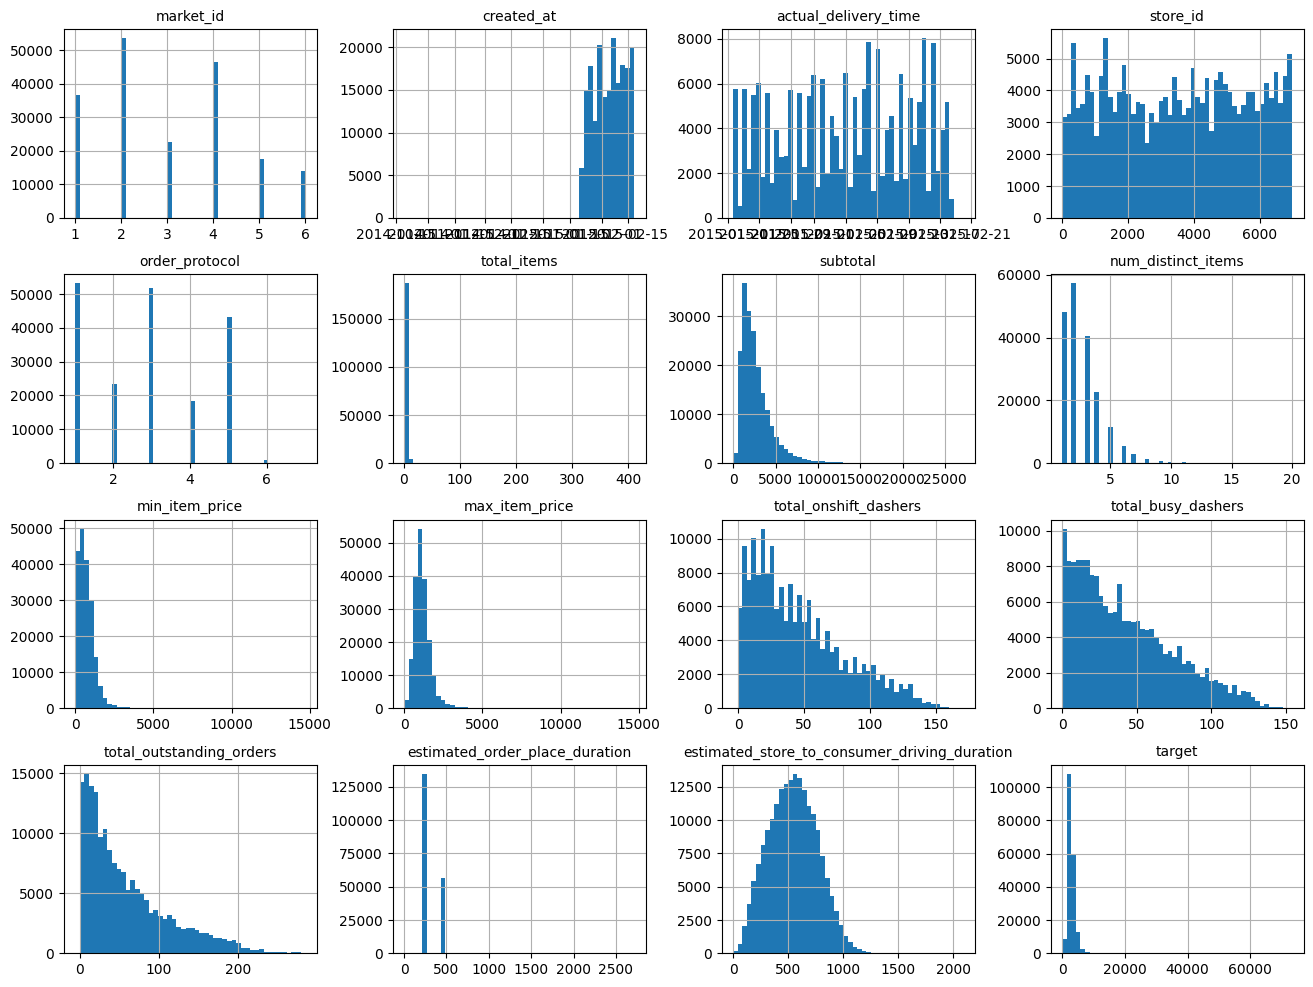

In [17]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

delivery.hist(bins=50, figsize=(16, 12))
plt.show()

In [18]:
corr_matrix = delivery.corr()

<ipython-input-18-0b64c1acb615>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = delivery.corr()


In [19]:
corr_matrix['target'].sort_values(ascending=False)

target                                          1.000000
estimated_store_to_consumer_driving_duration    0.224189
subtotal                                        0.210868
total_outstanding_orders                        0.185500
num_distinct_items                              0.152983
max_item_price                                  0.130130
total_items                                     0.114644
total_busy_dashers                              0.097040
estimated_order_place_duration                  0.096239
total_onshift_dashers                           0.077287
min_item_price                                  0.014693
store_id                                       -0.010681
market_id                                      -0.045586
order_protocol                                 -0.066536
Name: target, dtype: float64

In [20]:
X_set = pd.DataFrame(delivery, columns=['estimated_store_to_consumer_driving_duration', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_items'], index=delivery.index)
y_set = delivery['target'].copy()

In [21]:
X_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191466 entries, 0 to 197427
Data columns (total 5 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   estimated_store_to_consumer_driving_duration  190943 non-null  float64
 1   subtotal                                      191466 non-null  int64  
 2   num_distinct_items                            191466 non-null  int64  
 3   max_item_price                                191466 non-null  int64  
 4   total_items                                   191466 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 8.8 MB


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.2, random_state=42)

In [23]:
X_train.head()

,estimated_store_to_consumer_driving_duration,subtotal,num_distinct_items,max_item_price,total_items
2410,666.0,1854,2,900,2
68322,607.0,2165,3,795,3
187801,432.0,1000,1,1000,1
185615,522.0,2295,2,1050,2
34572,452.0,4585,5,1295,8


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler())
    ])

X_train_tr = num_pipeline.fit_transform(X_train)

lets build model

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_tr, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def pred_and_err(model, X=X_train_tr, y=y_train):
  y_pred = model.predict(X)
  print('squared error is : ', np.sqrt(mean_squared_error(y, y_pred)),'absolute error is : ', mean_absolute_error(y, y_pred))

In [27]:
pred_and_err(lin_reg, X_train_tr, y_train)



squared error is :  1091.7259371510047 absolute error is :  768.0952630481621


In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_tr, y_train)
pred_and_err(tree_reg, X_train_tr, y_train)

squared error is :  188.26017369476503 absolute error is :  25.833713438238735


OOO!!!!Looks great!lets check that again

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train_tr, y_train, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
tree_rmse_scores = np.sqrt(-scores)

In [30]:
def display_scores(scores):
  print("scores: ",scores)
  print("mean of scores: ", scores.mean())
  print("standard deviation: ", scores.std())

In [31]:
display_scores(tree_rmse_scores)

scores:  [1612.38522826 1609.06611523 1513.04628979 1561.97967669 1612.75595792
 1579.48039595 1545.03924982 1562.91767809 1545.96344565 1541.10952103]
mean of scores:  1568.374355842566
standard deviation:  32.569704230068666


OK...so tree is not so good...

In [32]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_tr, y_train)

RandomForestRegressor(random_state=42)

In [33]:
pred_and_err(forest_reg, X_train_tr, y_train)

squared error is :  457.5729855661617 absolute error is :  314.3543634928715


In [34]:
scores = cross_val_score(forest_reg, X_train_tr, y_train, cv=10, scoring='neg_mean_squared_error')
forest_rmse_error = np.sqrt(-scores)
display_scores(forest_rmse_error)

scores:  [1147.87698165 1125.60423783 1112.97205484 1179.52534506 1152.96471782
 1188.77988574 1133.85018394 1172.6201424  1169.29026354 1132.18768664]
mean of scores:  1151.5671499463122
standard deviation:  24.067540004223297


get much better

In [35]:
X_test_tr = num_pipeline.fit_transform(X_test)

In [36]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_tr, y_train)
pred_and_err(sgd_reg, X_train_tr, y_train)

squared error is :  1092.069343045794 absolute error is :  766.4350629822188


In [37]:
scores = cross_val_score(sgd_reg, X_train_tr, y_train, scoring='neg_mean_squared_error', cv=10)
sgd_rmse_error = np.sqrt(-scores)
display_scores(sgd_rmse_error)

scores:  [1092.46432386 1029.07140061 1058.92394694 1119.49252442 1097.34220794
 1131.48855671 1083.4520618  1116.43184375 1115.08806944 1075.66440195]
mean of scores:  1091.9419337410013
standard deviation:  29.77890685023181


In [38]:
from sklearn.metrics import accuracy_score
for reg in (lin_reg, tree_reg, forest_reg, sgd_reg):
  reg.fit(X_train_tr, y_train)
  y_pred = reg.predict(X_test_tr)
  print(reg.__class__.__name__, np.sqrt(mean_squared_error(y_test, y_pred)))

LinearRegression 1111.283170083773
DecisionTreeRegressor 1688.0054699265738
RandomForestRegressor 1172.370265870268
SGDRegressor 1111.5824789972737


In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_iter':[100, 1000, 5000], 'tol':[1e-3, 1e-2, 1e-4], 'eta0':[.1, .01, .5], 'penalty':[None]}
]
best_sgd_model = GridSearchCV(sgd_reg, param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)
best_sgd_model.fit(X_train_tr, y_train)

GridSearchCV(cv=3, estimator=SGDRegressor(),
             param_grid=[{'eta0': [0.1, 0.01, 0.5],
                          'max_iter': [100, 1000, 5000], 'penalty': [None],
                          'tol': [0.001, 0.01, 0.0001]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
pred_and_err(best_sgd_model, X_train_tr, y_train)

squared error is :  1091.8483214290964 absolute error is :  768.9379285846582


In [44]:
scores = cross_val_score(best_sgd_model, X_train_tr, y_train, scoring='neg_mean_squared_error', cv=10)
sgd_rmse_error = np.sqrt(-scores)
display_scores(sgd_rmse_error)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


scores:  [1092.2730174  1029.10320178 1059.34793308 1119.15614223 1096.92264329
 1131.73197139 1081.24783192 1116.27600102 1114.67540587 1075.30549671]
mean of scores:  1091.6039644690868
standard deviation:  29.76374076317909


In [45]:
y_pred = best_sgd_model.predict(X_test_tr)
print(best_sgd_model.__class__.__name__, np.sqrt(mean_squared_error(y_test, y_pred)))

GridSearchCV 1111.2270644577463
